In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

nobel = pd.read_csv('archive.csv')

wanted_output = nobel.filter(['Full Name', 'Sex'])
print(wanted_output)

                        Full Name   Sex
0    Jacobus Henricus van 't Hoff  Male
1                 Sully Prudhomme  Male
2          Emil Adolf von Behring  Male
3               Jean Henry Dunant  Male
4                  Frédéric Passy  Male
..                            ...   ...
964              Yoshinori Ohsumi  Male
965            Juan Manuel Santos  Male
966             David J. Thouless  Male
967          F. Duncan M. Haldane  Male
968         J. Michael Kosterlitz  Male

[969 rows x 2 columns]


In [133]:
nobel = nobel.assign(age_at_receival=lambda x: pd.to_datetime(x['Year'], format='%Y').dt.year - pd.to_datetime(x['Birth Date'], errors='coerce').dt.year)
print(nobel['age_at_receival'])

0      49.0
1      62.0
2      47.0
3      73.0
4      79.0
       ... 
964    71.0
965    65.0
966    82.0
967    65.0
968    73.0
Name: age_at_receival, Length: 969, dtype: float64


Text(0.5, 0, 'amount of prizes')

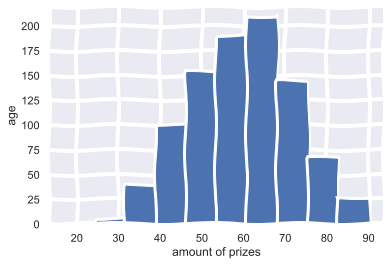

In [134]:
plt.hist(nobel['age_at_receival'])
plt.ylabel('age')
plt.xlabel('amount of prizes')

In [135]:
oldest = nobel['age_at_receival'].max()

print(oldest)

90.0


In [136]:
youngest = nobel['age_at_receival'].min()

print(youngest)

17.0


(array([61.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 10 artists>)

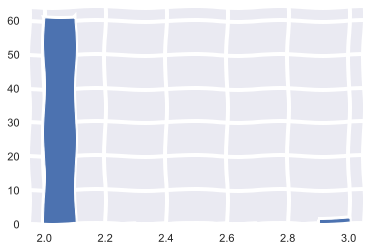

In [137]:
df = pd.DataFrame(nobel)
duplicates = df[df.duplicated(['Full Name'], keep=False)]
table = duplicates.pivot_table(index=['Full Name'], aggfunc='size')

plt.hist(table)